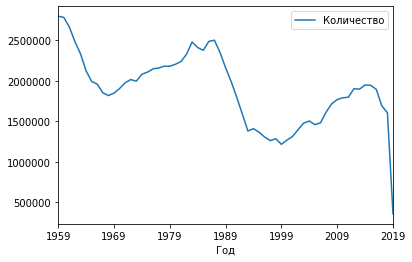

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import pandas as pd
from bs4 import BeautifulSoup
r = requests.get("https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html")
html = BeautifulSoup(r.content)
data = []
table = html.find("table")
for tr in table.find_all("tr"):
    data.append([td.get_text().replace(" ","") for td in tr.find_all("td")])
data = pd.DataFrame(data[1:], columns=["Год", "Количество"])
data["Количество"] = data["Количество"].astype("int")
data["Год"] = data["Год"].str.slice(0,4)
data = data.set_index("Год")
data.plot.line()
plt.show()